In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
def exp_dist(lambda_val):
    results =[]
    for i in range(0,10000):
        results.append(-np.log(random.uniform(0,1))/lambda_val)
        
    plt.hist(results, density=True, label='Generated Data')
    # Calculate the range of x values for the true exponential distribution
    x = np.linspace(0, np.max(results))
    # Calculate the corresponding y values for the true exponential distribution
    y = lambda_val * np.exp(-lambda_val * x)

    # Plot the true exponential distribution curve
    plt.plot(x, y, 'r', label='True Distribution')

    # Set plot labels and legend
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.title('Exponential Distribution')

    # Display the plot
    plt.show()

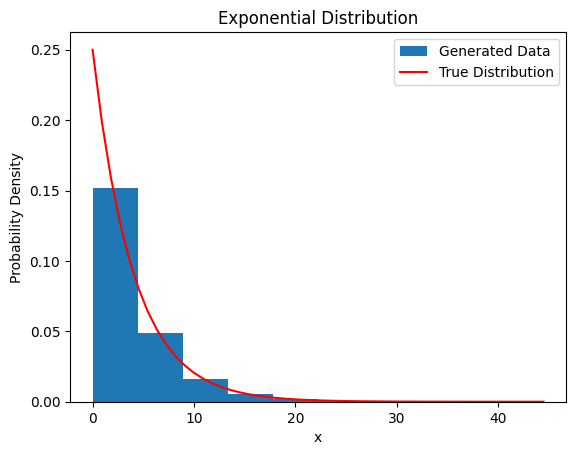

In [3]:
exp_dist(0.25)

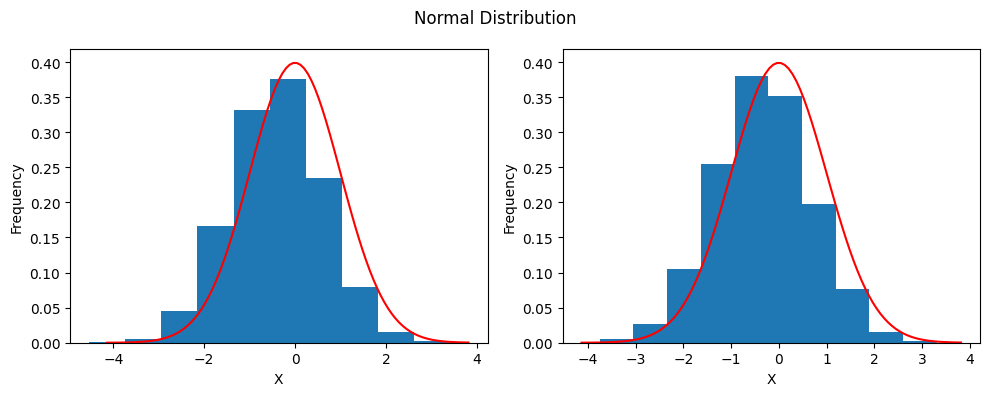

In [4]:
def box_muller():
    z1=[]
    z2=[]
    for i in range(0,10000):
        random_value1 = random.uniform(0,1)
        random_value2 = random.uniform(0,1)
        theta = 2 * np.pi * random_value2
        r = math.sqrt(-2 * np.log(random_value1))
        z1.append(r * math.cos(theta))
        z2.append(r * math.sin(theta))

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].hist(z1, align='left', density=True)
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Frequency')

    axs[1].hist(z2, align='left', density=True)
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Frequency')
    
    fig.suptitle('Normal Distribution')  
    
    x = np.linspace(min(z1 + z2), max(z1 + z2), 100)
    y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
    axs[0].plot(x, y, 'r-')
    axs[1].plot(x, y, 'r-')
    plt.tight_layout()
    plt.show()

box_muller()

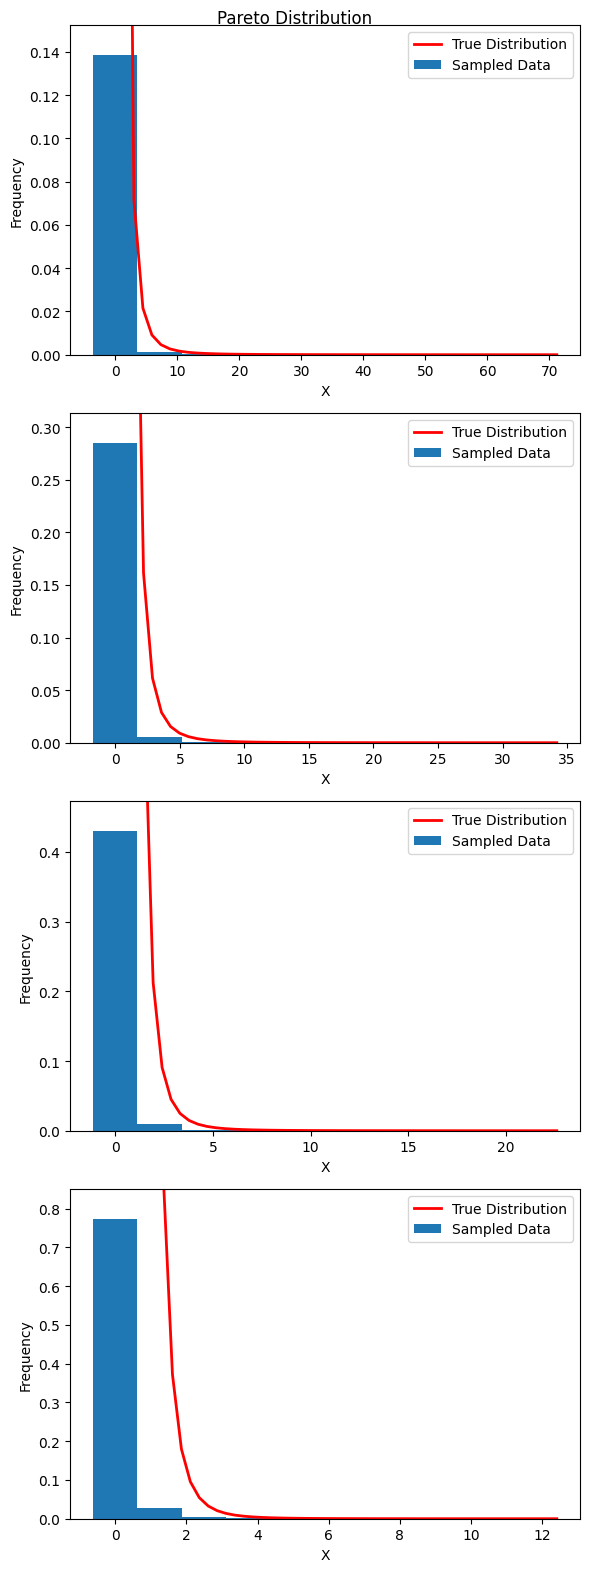

In [61]:
def pareto_value(k, beta):
    return beta * ((np.random.uniform(0, 1) ** (-1 / k)) - 1)


def pareto():
    beta = 1
    k_values = [2.05, 2.5, 3, 4]
    NUM_ITERATIONS = 10000
    
    results = []
    for k in k_values:
        results.append([pareto_value(k, beta) for _ in range(NUM_ITERATIONS)])

    fig, axs = plt.subplots(len(results), figsize=(6, 4 * len(results)))

    for i, result in enumerate(results):
 
      
        hist_values, x_values = np.histogram(result, density=True)
        axs[i].set_ylim([0, np.max(hist_values)*1.1])  # Set y-axis limits
        x = np.linspace(0.1, np.max(x_values))
        true_dist = (k_values[i] * beta ** k_values[i]) / (x ** (k_values[i] + 1))
        axs[i].plot(x, true_dist, color='red', lw=2, label='True Distribution')
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Frequency')
        axs[i].hist(result, align='left', density=True, label='Sampled Data')
        axs[i].legend()

    fig.suptitle('Pareto Distribution')
    plt.tight_layout()
    plt.show()

pareto()